In [1]:
# Load needed Python modules
import numpy as np
import matplotlib.pyplot as plt
import os
import netCDF4
import astropy
import scipy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.convolution import convolve as ap_convolve
from astropy.convolution import Box2DKernel
from matplotlib.axes import Axes
from netCDF4 import num2date
from scipy import stats

NameError: name 'srskew' is not defined

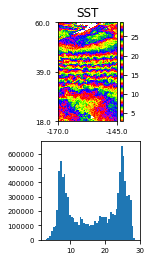

In [2]:
# Change to SSD with files
os.chdir('/nfs/cnhlab003/cnh')

for filename in os.listdir('mur-sst'):
    if filename[:6] == '201111':

        # Create "handle" to access netCDF file
        tFile = netCDF4.Dataset('mur-sst/'+filename)

        # Extract data from file
        sst=tFile['analysed_sst']
        date_num = tFile['time'][:]
        units = tFile.variables['time'].units
        date = num2date(date_num, units)[0]
        date = str(date)
        date = date[:10]

        # Determine latitude and longitude range
        lathi = 15000
        latlo = 10800
        lonhi = 3500
        lonlo = 1000
        
        # Extract a subregion
        sstReg=sst[0, latlo:lathi, lonlo:lonhi]-273.
        
        # Extract coordinate data
        lat = tFile.variables['lat']
        lon = tFile.variables['lon']
        latmin = (latlo/100) + lat.valid_min
        lonmin = (lonlo/100) + lon.valid_min
        latmax = (lathi/100) + lat.valid_min
        lonmax = (lonhi/100) + lon.valid_min
        
        # Make sst plot
        ax = plt.subplot(231)
        ax.tick_params(axis='both', labelsize=7)
        fig1 = plt.imshow(sstReg,origin='lower',cmap='prism')
        plt.xticks([0, lonhi-lonlo], [lonmin, lonmax])
        plt.yticks([0, (lathi-latlo)/2, lathi-latlo], [latmin, ((latmax-latmin)/2)+latmin, latmax])
        plt.title("SST")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(fig1, cax=cax)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=7)
        
        # Make sst histogram
        ax = plt.subplot(234)
        ax.tick_params(axis='both', labelsize=7)
        phi = sstReg.flatten()
        hist = plt.hist(phi, bins=50)
        
        # sst labels
        srmax = str(round(np.nanmax(sstReg), 3))
        srmin = str(round(np.nanmin(sstReg), 3))
        srmean = str(round(np.nanmean(sstReg), 3))
        srstd = str(round(np.nanstd(sstReg), 3))
        #srskew = str(round(stats.skew(sstReg, nan_policy='omit', axis=None), 3))
        #srkurt = str(round(stats.kurtosis(sstReg, axis=None, nan_policy='omit'), 3))
        plt.xlabel('max: '+srmax+'\n min: '+srmin+'\n mean: '+srmean+'\n std: '+srstd+'\n skew: '+srskew+'\n kurtosis: '+srkurt)
        
        # Convolve
        box_2D_kernel = Box2DKernel(9)
        nan=float('nan')
        sstReg=np.ma.filled(sstReg,nan)
        sstReg[ :, 0]=nan
        sstReg[ 0, :]=nan
        sstReg[ :,-1]=nan
        sstReg[-1, :]=nan
        sstReg2=ap_convolve(sstReg, box_2D_kernel)
        dd=sstReg2
        dd=dd[9:-9, 9:-9]
        dd=np.ma.masked_invalid(dd)
        
        # Make convolve plot
        ax = plt.subplot(232)
        ax.tick_params(axis='both', labelsize=7)
        fig2 = plt.imshow(dd,origin='lower',cmap='prism')
        plt.xticks([0, lonhi-lonlo], [lonmin, lonmax])
        plt.yticks([0, (lathi-latlo)/2, lathi-latlo], [latmin, ((latmax-latmin)/2)+latmin, latmax])
        plt.title("Convolved SST")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(fig2, cax=cax)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=7)
        
        # Make convolve histogram
        ax = plt.subplot(235)
        ax.tick_params(axis='both', labelsize=7)
        phi = dd.flatten()
        hist = plt.hist(phi, bins=50)
        
        # Convolve labels
        ddmax = str(round(np.nanmax(dd), 3))
        ddmin = str(round(np.nanmin(dd), 3))
        ddmean = str(round(np.nanmean(dd), 3))
        ddstd = str(round(np.nanstd(dd), 3))
        ddskew = str(stats.mstats.skew(dd, axis=None))
        ddkurt = str(stats.mstats.kurtosis(dd, axis=None))
        plt.xlabel('max: '+ddmax+'\n min: '+ddmin+'\n mean: '+ddmean+'\n std: '+ddstd+'\n skew: '+ddskew[:6]+'\n kurtosis: '+ddkurt[:6])
        
        # Make difference plot
        ax = plt.subplot(233)
        sstReg=sstReg[9:-9, 9:-9]
        dif = sstReg - dd
        fig3 = plt.imshow(dif, origin='lower', cmap='gist_ncar', vmin=-0.1, vmax=0.1)
        plt.xticks([0, lonhi-lonlo], [lonmin, lonmax])
        plt.yticks([0, (lathi-latlo)/2, lathi-latlo], [latmin, ((latmax-latmin)/2)+latmin, latmax])
        plt.title("Difference")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(fig3, cax=cax)
        ax.tick_params(axis='both', labelsize=7)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs, fontsize=7)
        
        # Make difference histogram
        ax = plt.subplot(236)
        phi = dif.flatten()
        phi = phi[np.logical_not(np.isnan(phi))]
        ax.tick_params(axis='both', labelsize=7)
        plt.hist(phi, bins=50)
        
        # Difference labels
        difmax = str(round(np.nanmax(dif), 3))
        difmin = str(round(np.nanmin(dif), 3))
        difmean = str(round(np.nanmean(dif), 6))
        difstd = str(round(np.nanstd(dif), 3))
        difskew = str(stats.skew(dif, axis=None, nan_policy='omit'))
        difkurt = str(round(stats.kurtosis(dif, axis=None, nan_policy='omit'), 3))
        plt.xlabel('max: '+difmax+'\n min: '+difmin+'\n mean: '+difmean+'\n std: '+difstd+'\n skew: '+difskew[:6]+'\n kurtosis: '+difkurt)
        
        # Format plots
        plt.suptitle(date, fontsize=16)
        plt.subplots_adjust(wspace = 1.05, bottom = 0.3)
        
        # Save and show fig
        os.chdir('/home/culberta/public_html/sstconvdif-imgs-2011/november')
        plt.savefig(str(date) + '.png', dpi = 200)
        plt.show()
        plt.clf()
        os.chdir('/nfs/cnhlab003/cnh')